# **Análise de Variância**

In [101]:
# Install the RColorBrewer package if you haven't already
install.packages("RColorBrewer")

Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



## **0) Construção do modelo**

In [102]:

library(RColorBrewer)
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")  # Set to UTF-8

tab <- read.csv(file = './DoE/DoE - Results v5.csv', sep = ",", dec = ".")


[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [103]:
TIC<-tab$Cost
alg<-factor(tab$algorithm)
n<-factor(tab$N)
cv<-factor(tab$cv)
rho<-factor(tab$rho)
p<-factor(tab$p)

In [106]:
# av<-aov(TIC~n*cv*rho*p*alg)
av<-aov(TIC~n+cv+rho+p+alg+n:cv+n:rho+n:p+n:alg+cv:rho+cv:p+cv:alg+rho:p+rho:alg+p:alg)
summary(av)

             Df    Sum Sq   Mean Sq  F value   Pr(>F)    
n             2 5.722e+11 2.861e+11 1697.925  < 2e-16 ***
cv            2 5.406e+08 2.703e+08    1.604 0.201623    
rho           2 1.878e+11 9.389e+10  557.188  < 2e-16 ***
p             2 1.568e+09 7.839e+08    4.652 0.009770 ** 
alg           3 7.368e+10 2.456e+10  145.750  < 2e-16 ***
n:cv          4 1.308e+10 3.270e+09   19.406 2.45e-15 ***
n:rho         4 2.148e+11 5.370e+10  318.681  < 2e-16 ***
n:p           4 3.781e+09 9.453e+08    5.610 0.000184 ***
n:alg         6 1.231e+10 2.051e+09   12.171 3.38e-13 ***
cv:rho        4 4.769e+09 1.192e+09    7.076 1.31e-05 ***
cv:p          4 2.496e+08 6.240e+07    0.370 0.829880    
cv:alg        6 1.583e+09 2.639e+08    1.566 0.153916    
rho:p         4 1.177e+09 2.942e+08    1.746 0.137820    
rho:alg       6 1.595e+10 2.658e+09   15.773  < 2e-16 ***
p:alg         6 1.219e+09 2.032e+08    1.206 0.300744    
Residuals   912 1.537e+11 1.685e+08                      
---
Signif. co

## **1) Boxplots**

In [107]:
options(repr.plot.width=15)

### **1.1) Geral**

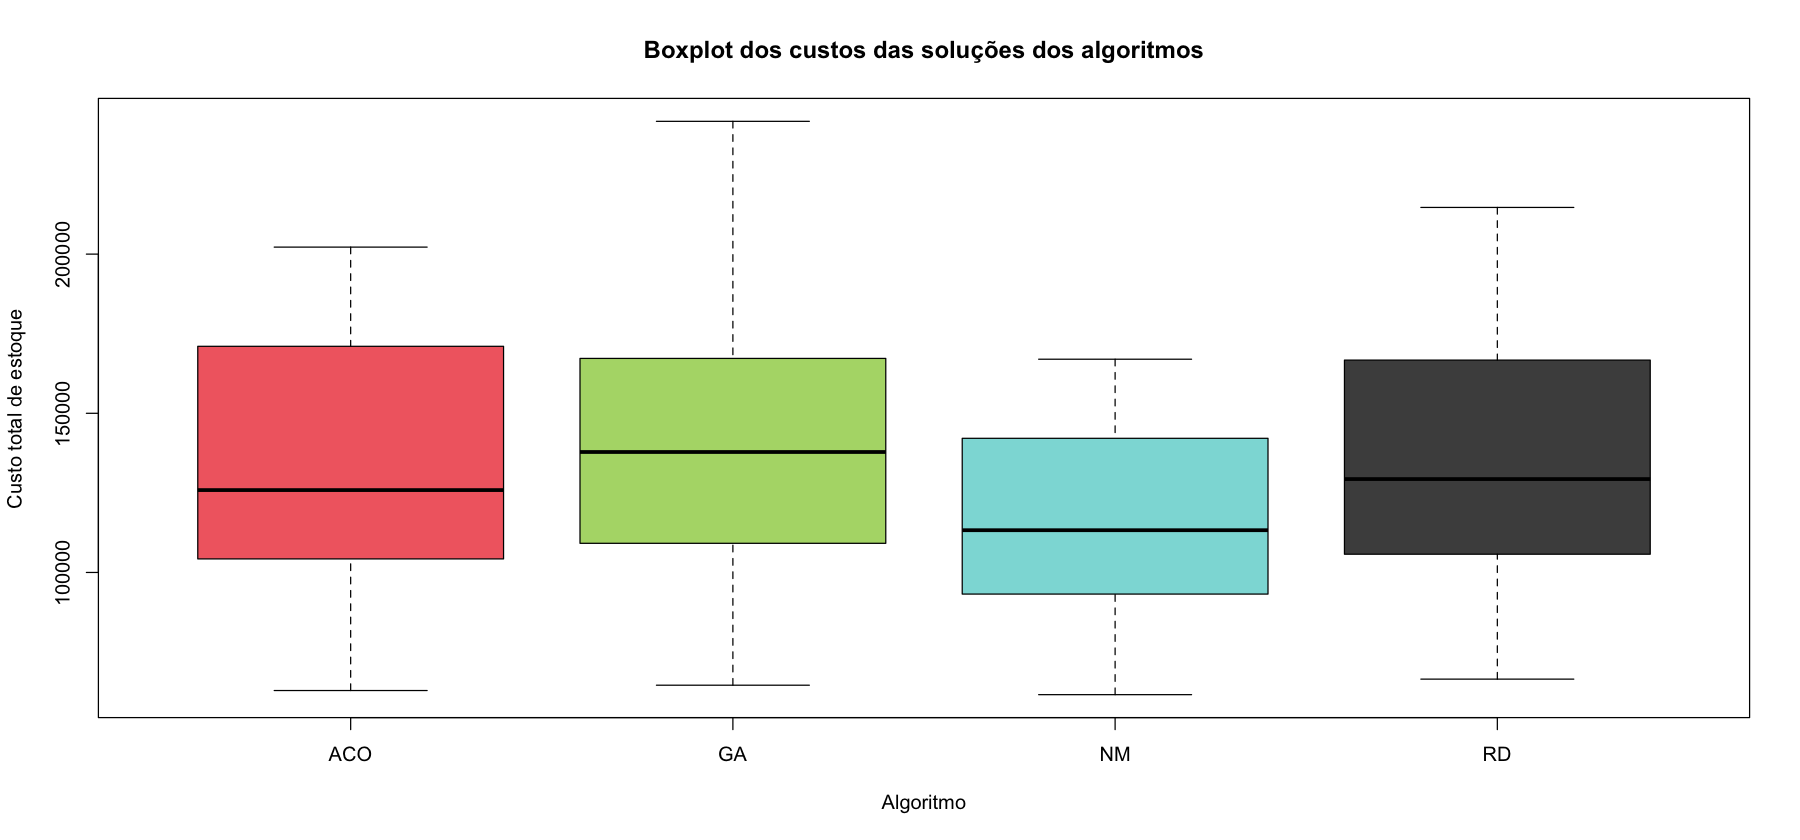

In [121]:
# Light gray background color
par(bg = "#ffffff")
# Add labels to the axes
xlabel <- "Algoritmo"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos das soluções dos algoritmos"
# boxplot_colors <- brewer.pal(4, "RdBu")
boxplot_colors <- c("#f16a70","#b1d877","#8cdcda", "#4d4d4d")


boxplot(TIC~alg, xlab = xlabel, ylab = ylabel, main = title, col = boxplot_colors)



### **1.2) Alg x N**

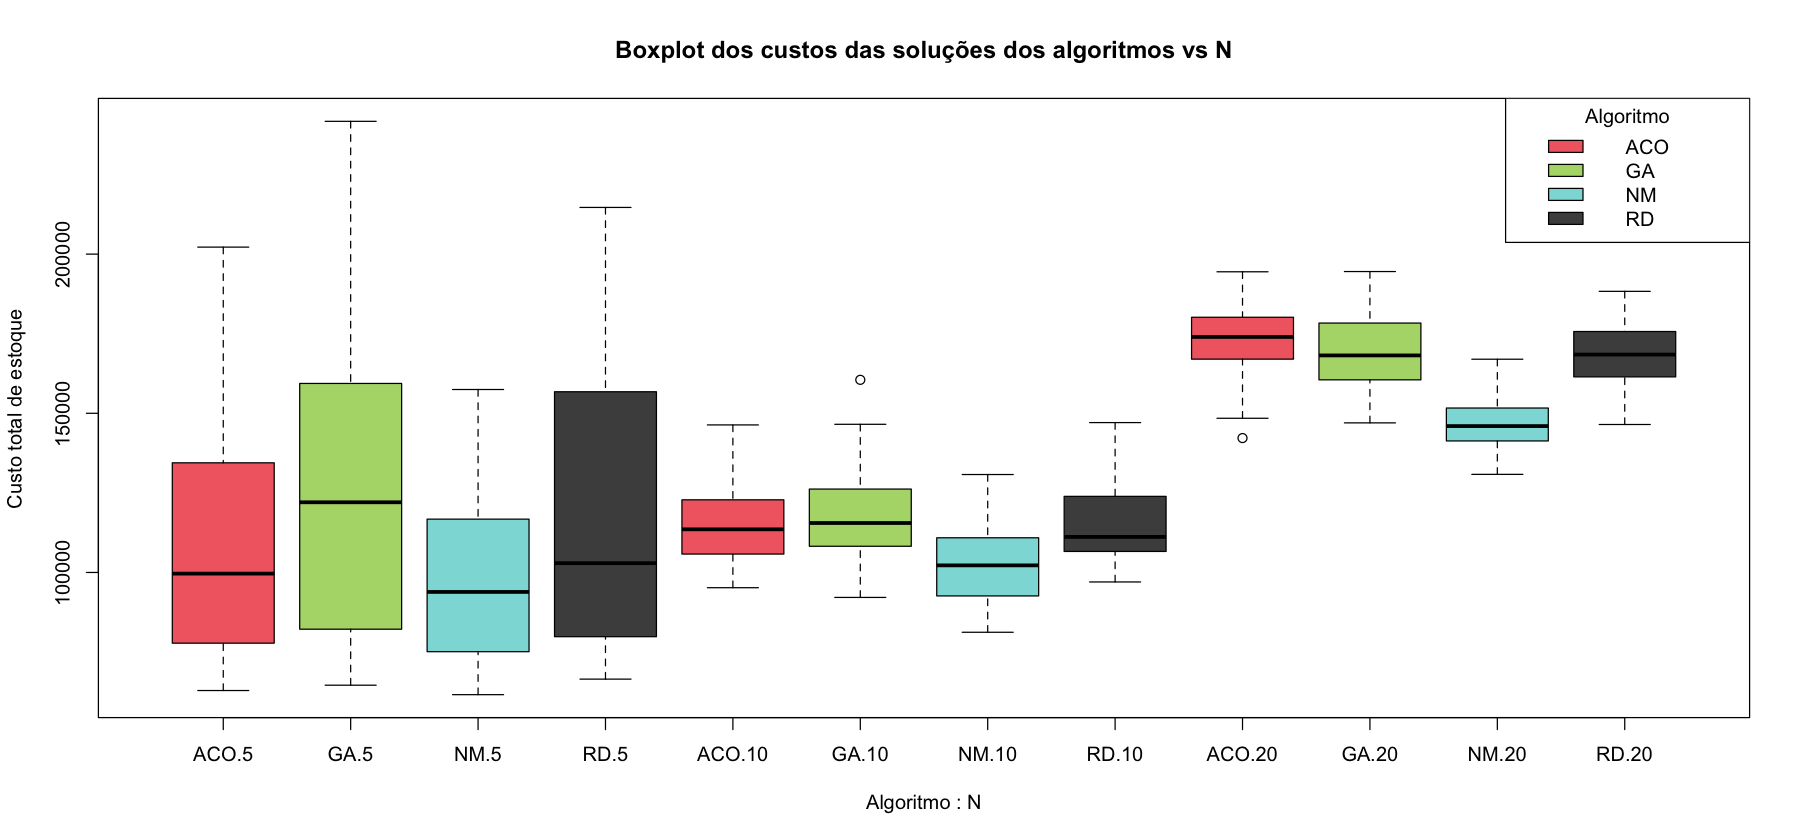

In [122]:
# Light gray background color
par(bg = "#ffffff")
xlabel <- "Algoritmo : N"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos das soluções dos algoritmos vs N"

boxplot(TIC ~ alg*n, xlab = xlabel, ylab = ylabel, main = title,col = boxplot_colors)  # Adjust the width as needed
# Create a legend for the 'alg' factor
legend("topright", legend = levels(factor(alg)), fill = boxplot_colors, title = "Algoritmo")


### **1.3) Alg x cv**

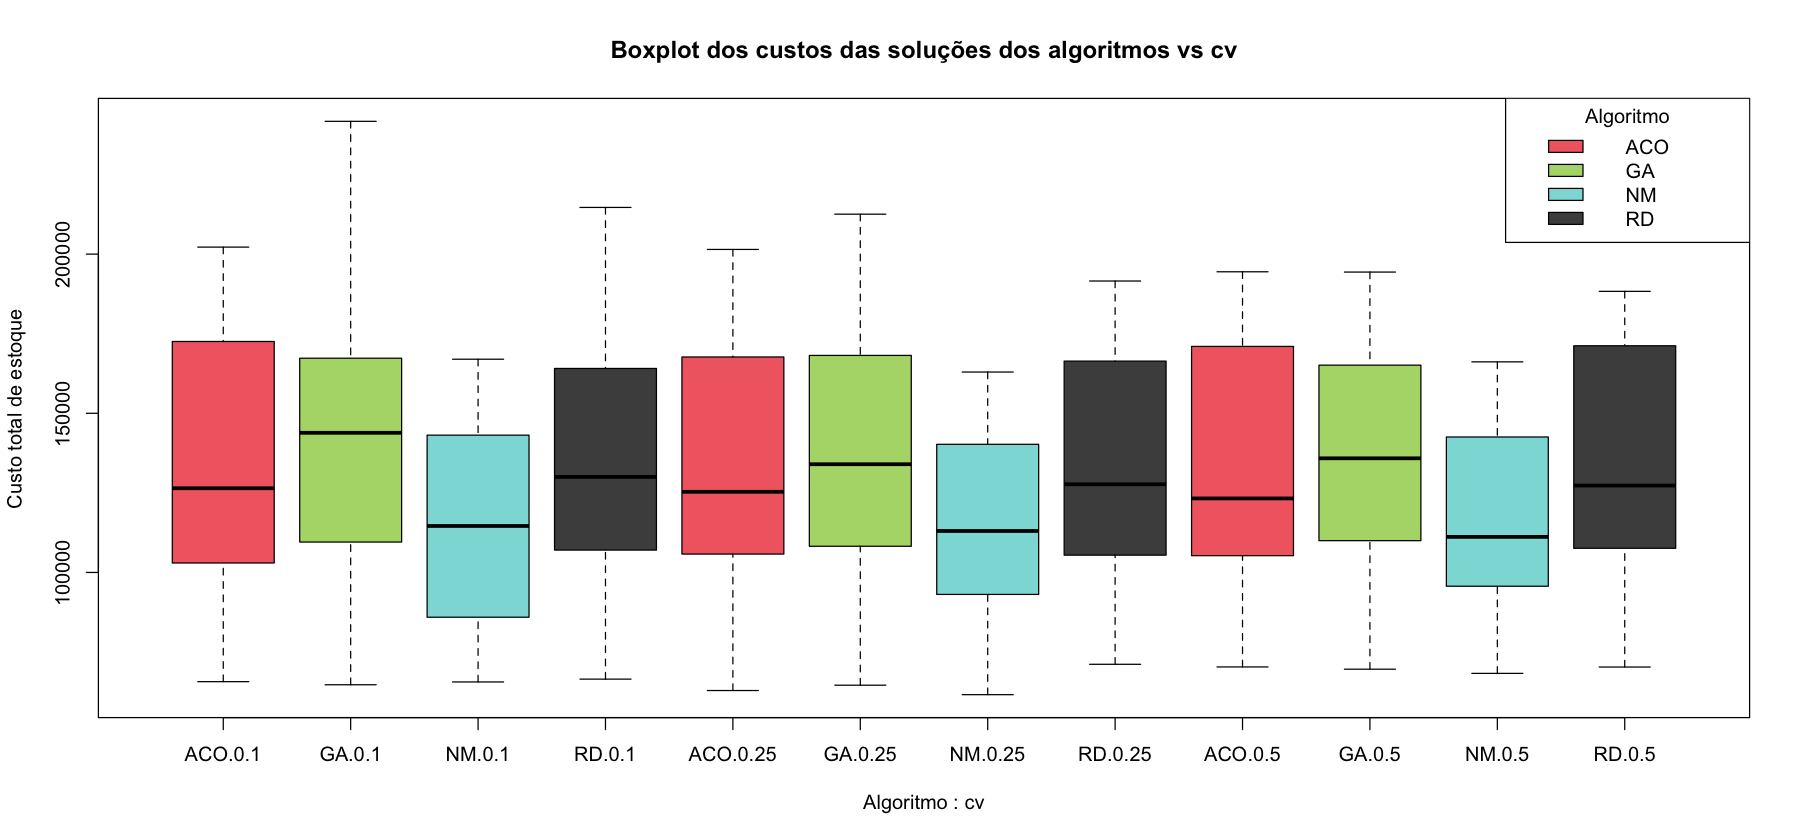

In [123]:
# Light gray background color
par(bg = "#ffffff")
xlabel <- "Algoritmo : cv"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos das soluções dos algoritmos vs cv"

boxplot(TIC ~ alg*cv, xlab = xlabel, ylab = ylabel, main = title, col = boxplot_colors)  # Adjust the width as needed
# Create a legend for the 'alg' factor
legend("topright", legend = levels(factor(alg)), fill = boxplot_colors, title = "Algoritmo")

### **1.4) Alg x p**

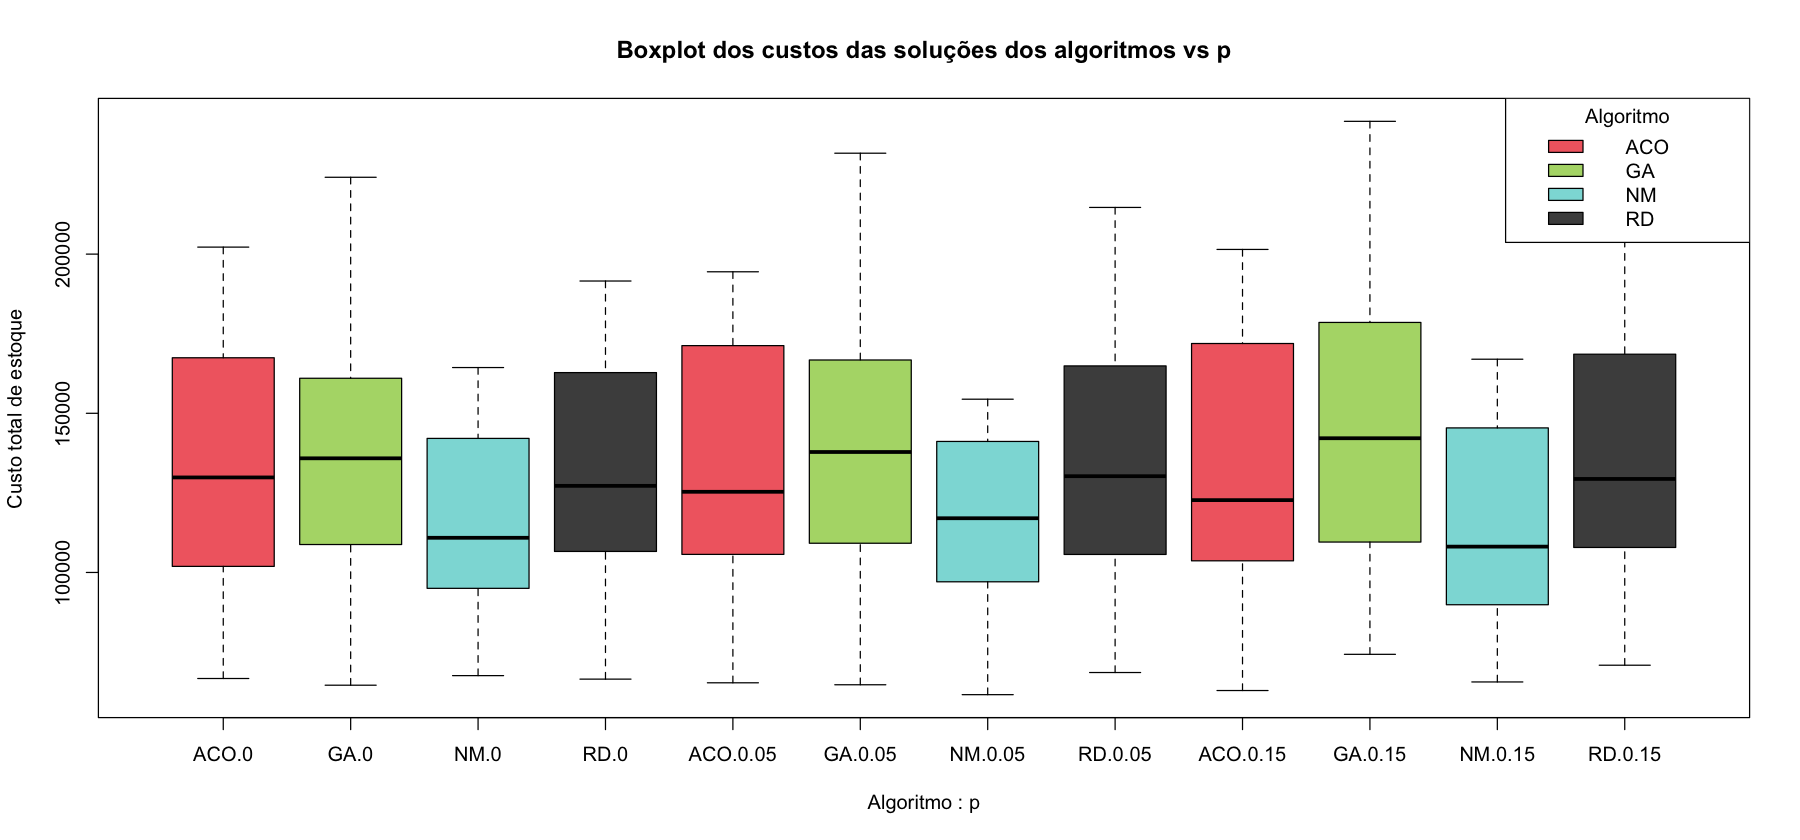

In [124]:
# Light gray background color
par(bg = "#ffffff")
xlabel <- "Algoritmo : p"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos das soluções dos algoritmos vs p"

boxplot(TIC ~ alg*p, xlab = xlabel, ylab = ylabel, main = title,col = boxplot_colors)  # Adjust the width as needed
# Create a legend for the 'alg' factor
legend("topright", legend = levels(factor(alg)), fill = boxplot_colors, title = "Algoritmo")


### **1.5) Alg x rho**

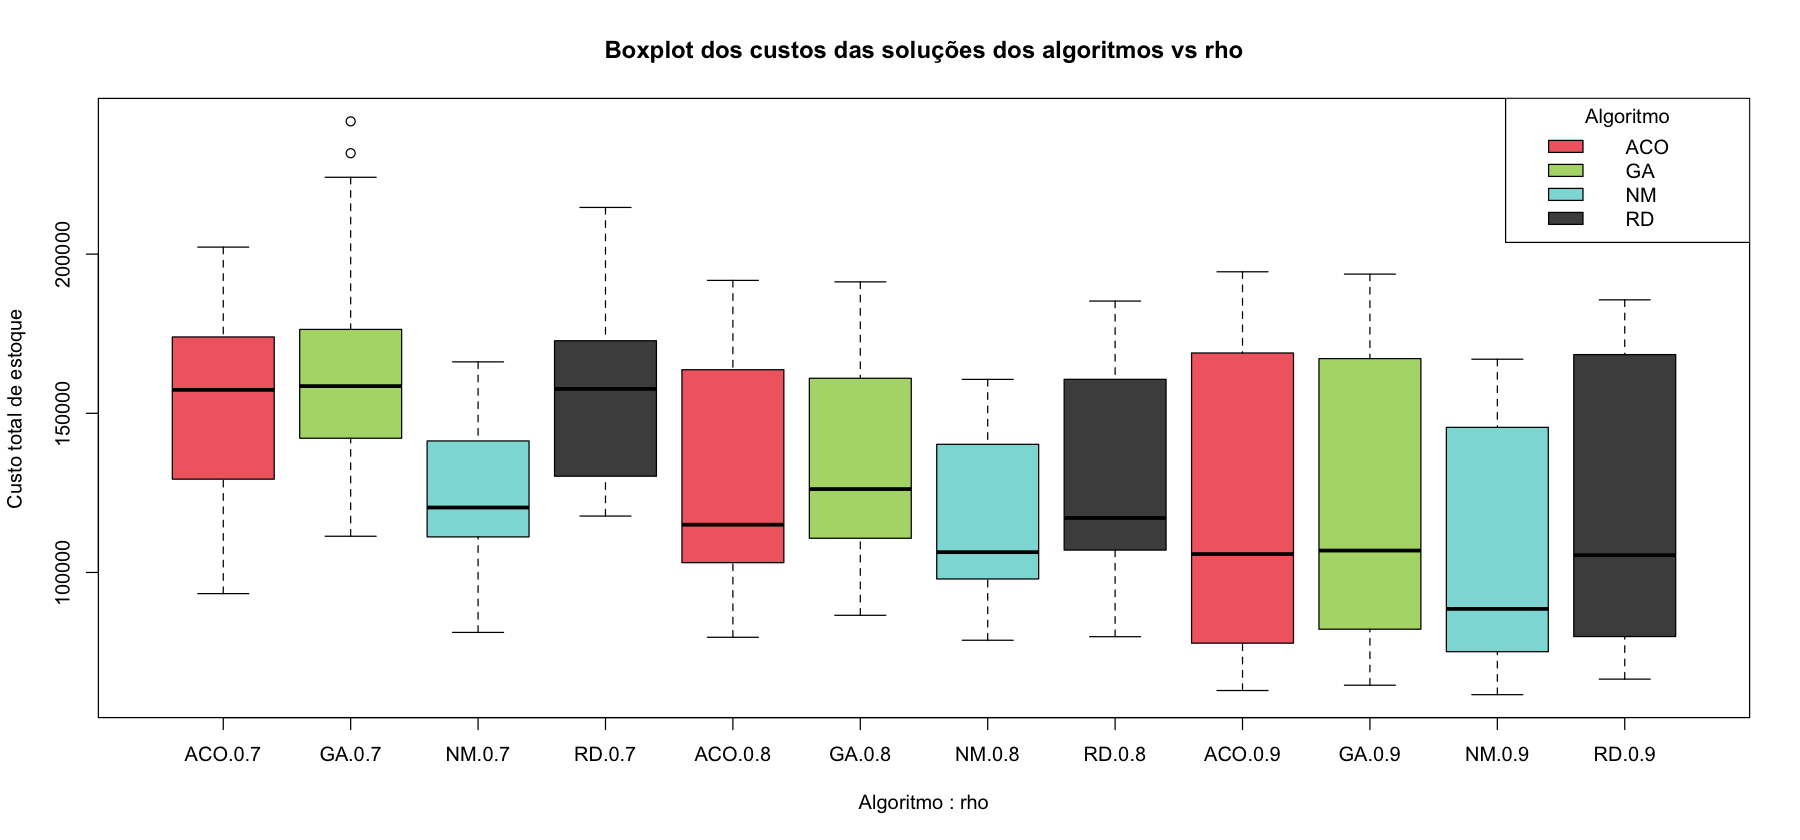

In [125]:
# Light gray background color
par(bg = "#ffffff")
xlabel <- "Algoritmo : rho"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos das soluções dos algoritmos vs rho"

boxplot(TIC ~ alg*rho, xlab = xlabel, ylab = ylabel, main = title,col = boxplot_colors)  # Adjust the width as needed
# Create a legend for the 'alg' factor
legend("topright", legend = levels(factor(alg)), fill = boxplot_colors, title = "Algoritmo")


## **2) Resíduos**

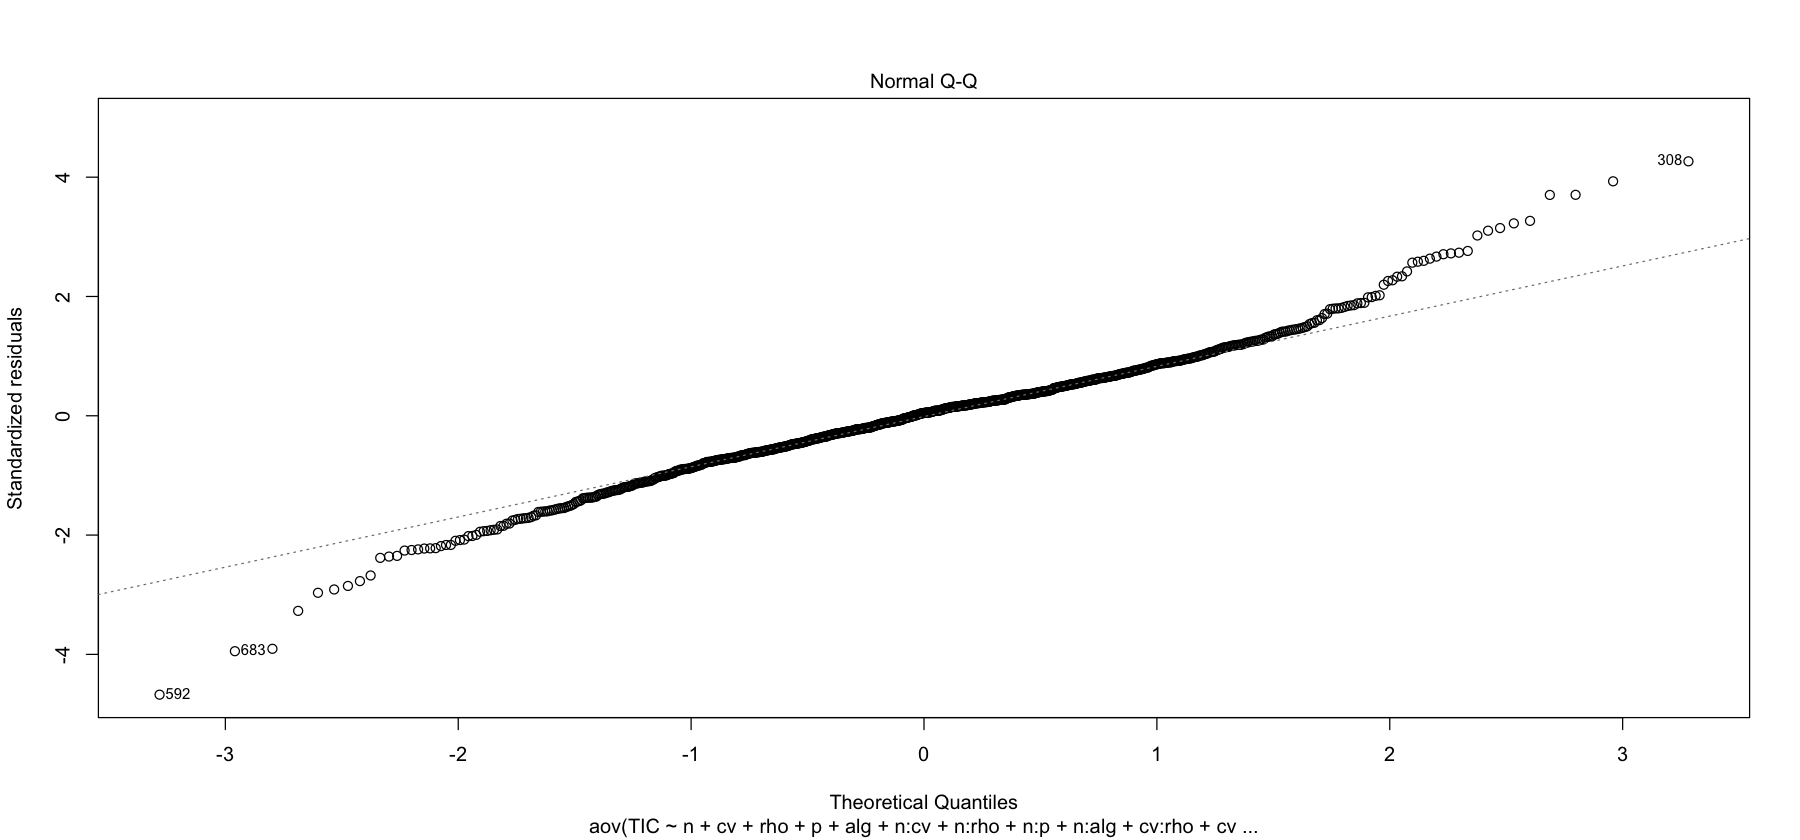

In [113]:
# Light gray background color
par(bg = "#ffffff")
plot(av,2)

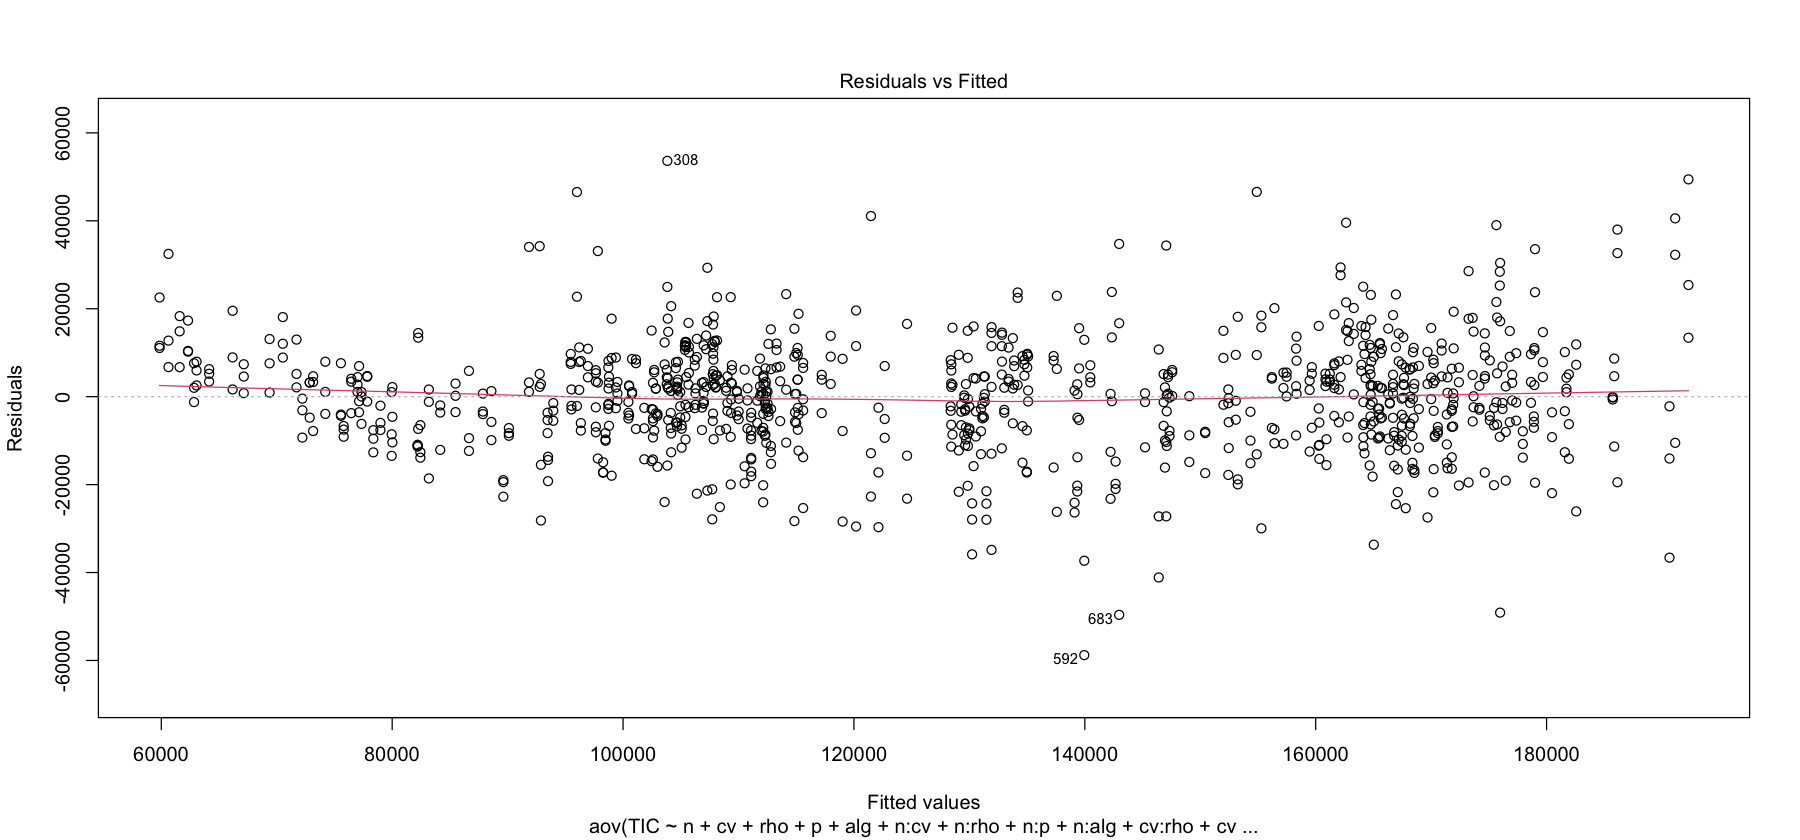

In [114]:
# Light gray background color
par(bg = "#ffffff")
plot(av, 1)

## **3) Interaction plot**

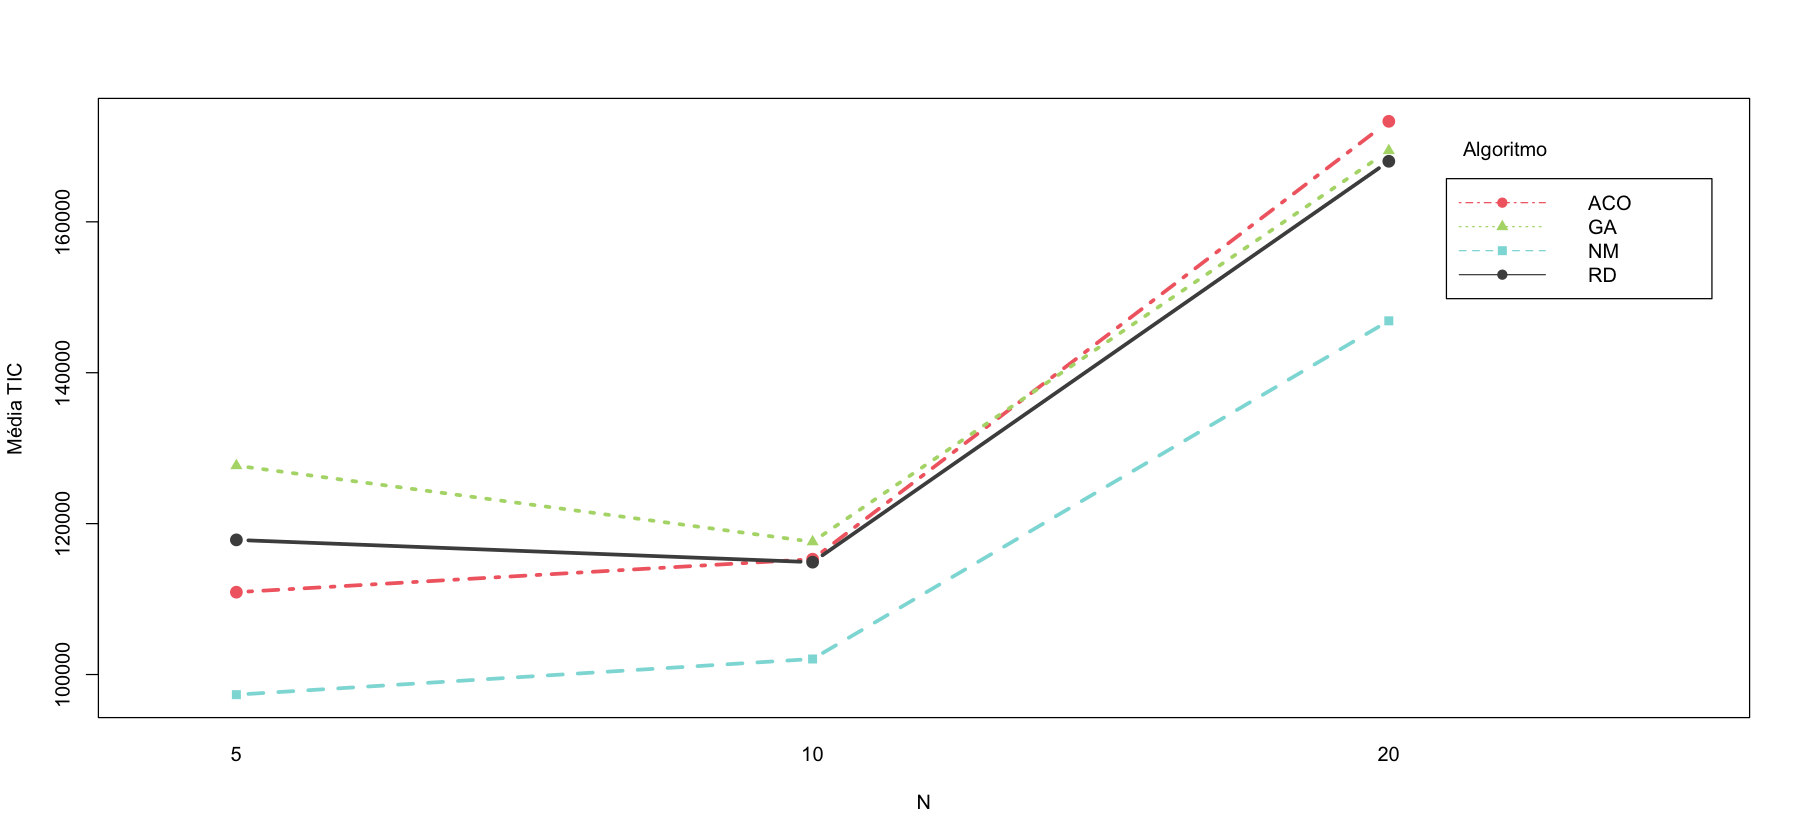

In [115]:
par(bg = "#ffffff")
interaction.plot(x.factor     = n,
                 trace.factor = alg,
                 response     = TIC,
                 fun = mean,
                 type="b",
                 col = boxplot_colors,
                 pch=c(19, 17, 15),             ### Symbols for levels of trace var.
                 fixed=TRUE,                    ### Order by factor order in data
                 leg.bty = "o",
                 xlab = "N",  # Change the x-axis label
                 ylab = "Média TIC",
                 trace.label = "Algoritmo",
                 
                 lwd=3
                 )



## **4) Outros fatores**

### **4.1) N**

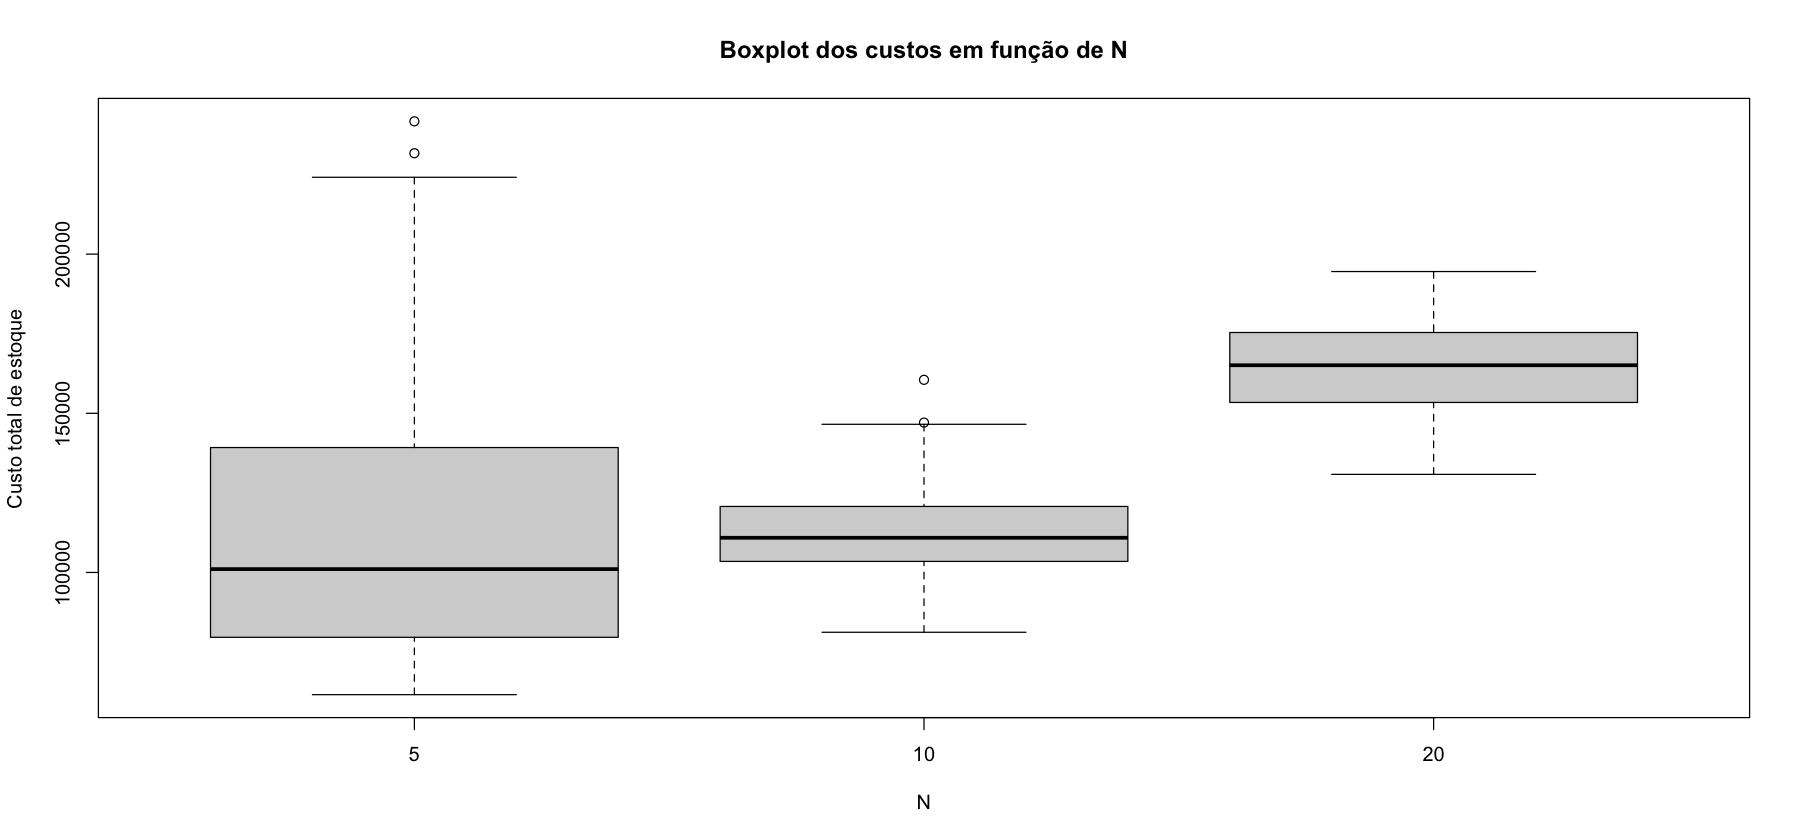

In [116]:
# Light gray background color
par(bg = "#ffffff")
# Add labels to the axes
xlabel <- "N"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos em função de N"
# boxplot_colors <- brewer.pal(4, "RdBu")

boxplot(TIC~n, xlab = xlabel, ylab = ylabel, main = title)

### **4.2) p**

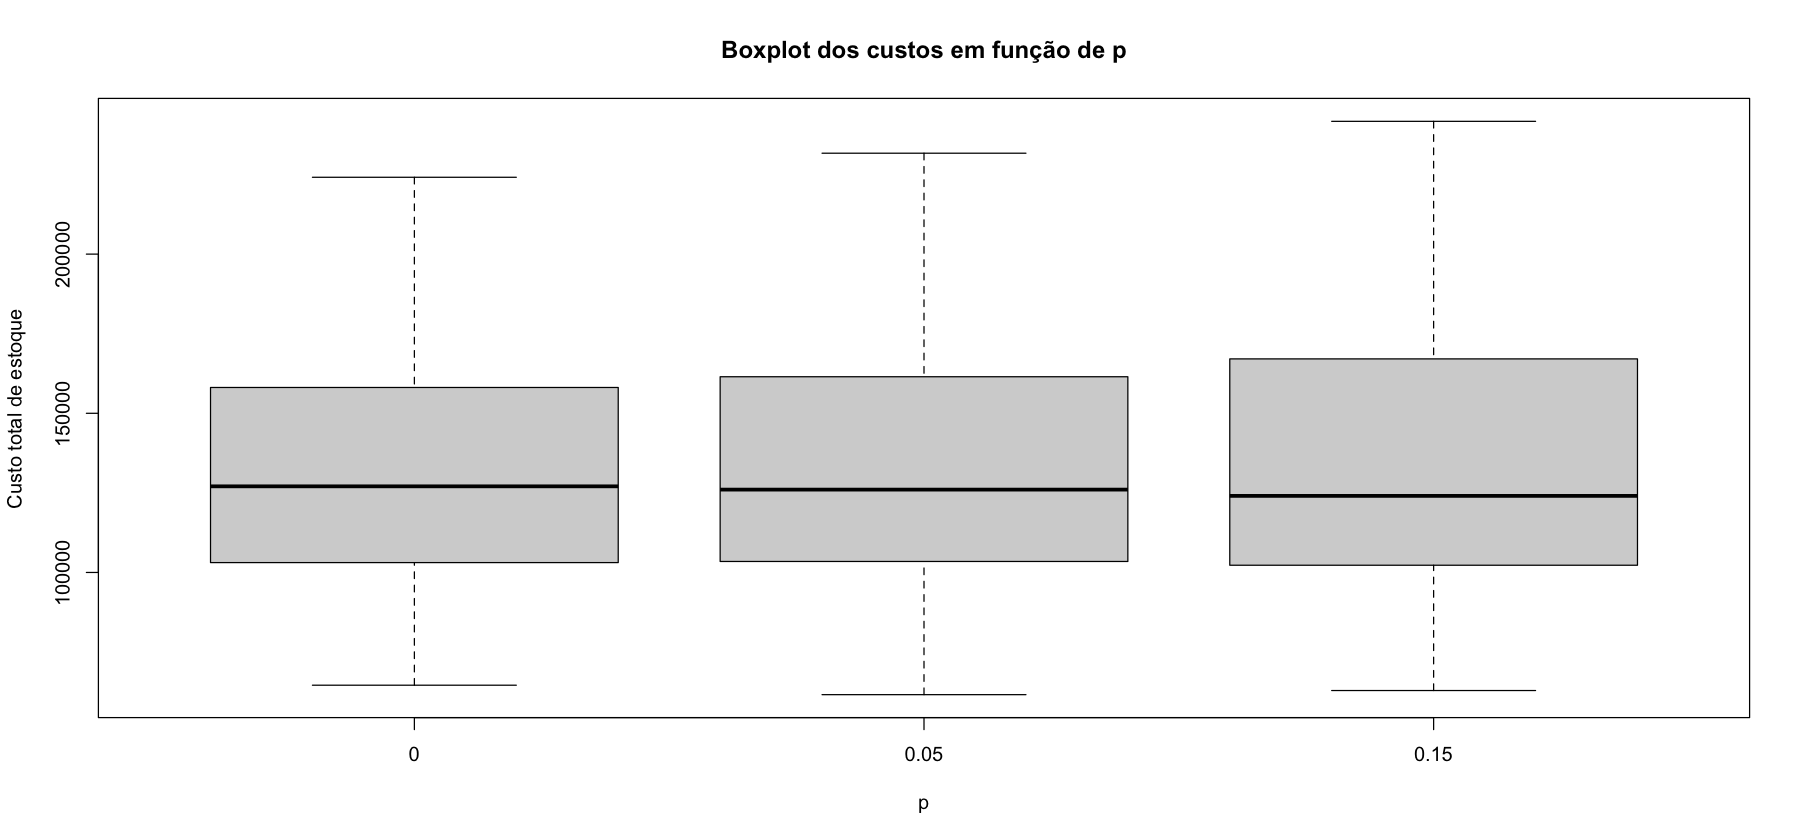

In [117]:
# Light gray background color
par(bg = "#ffffff")
# Add labels to the axes
xlabel <- "p"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos em função de p"
# boxplot_colors <- brewer.pal(4, "RdBu")

boxplot(TIC~p, xlab = xlabel, ylab = ylabel, main = title)

### **4.3) rho**

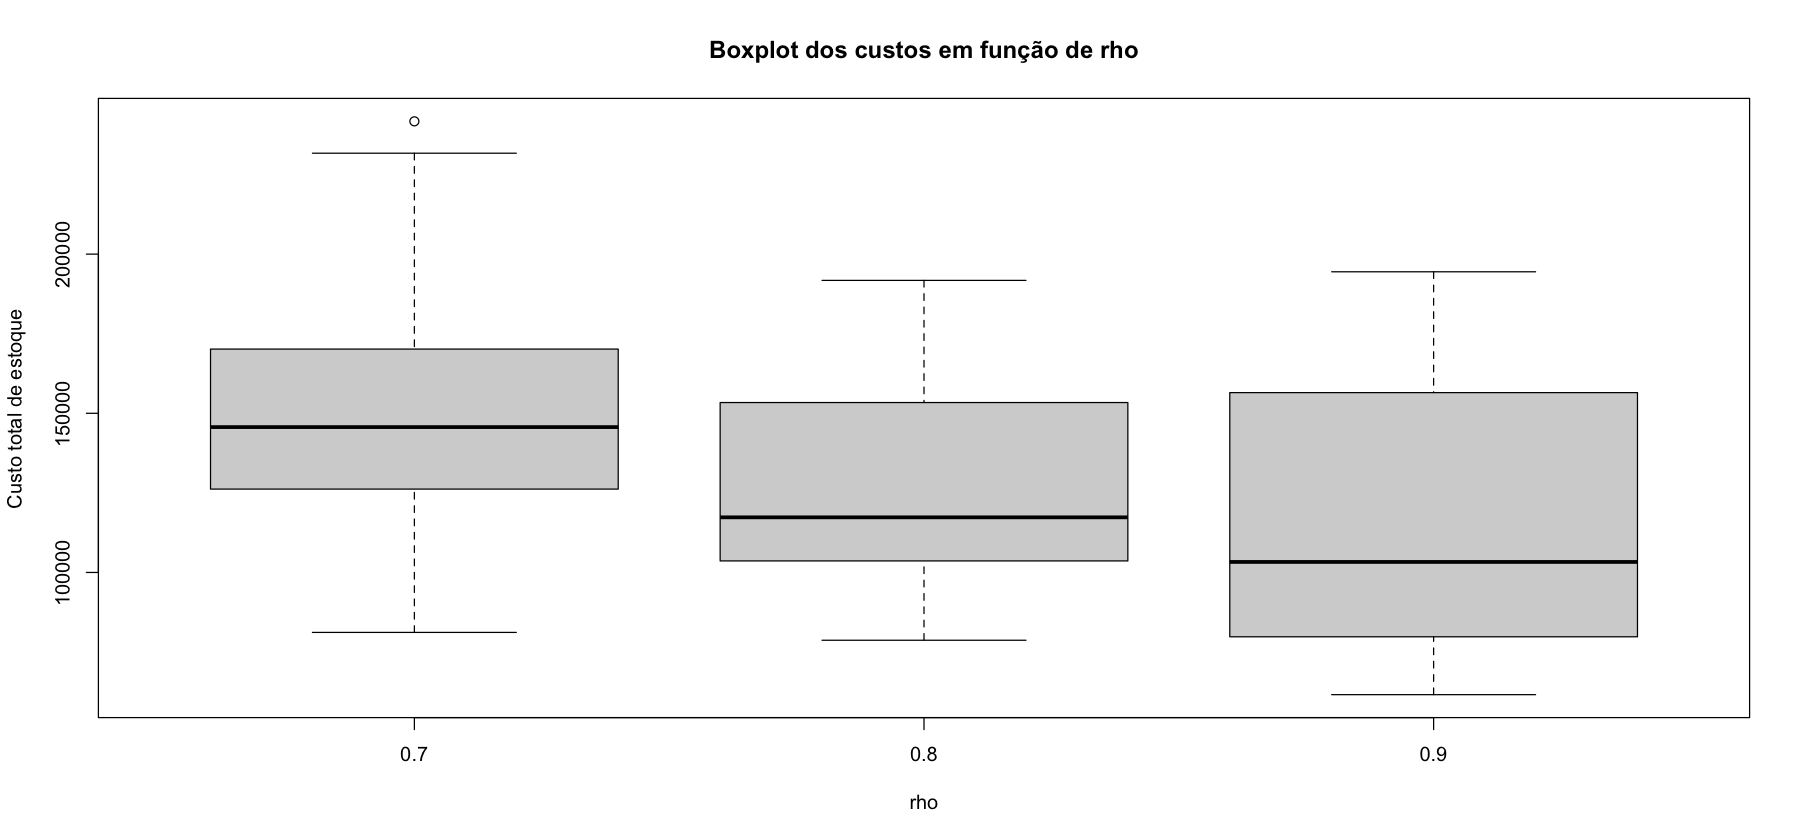

In [118]:
# Light gray background color
par(bg = "#ffffff")
# Add labels to the axes
xlabel <- "rho"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos em função de rho"
# boxplot_colors <- brewer.pal(4, "RdBu")

boxplot(TIC~rho, xlab = xlabel, ylab = ylabel, main = title)

### **4.4) cv**

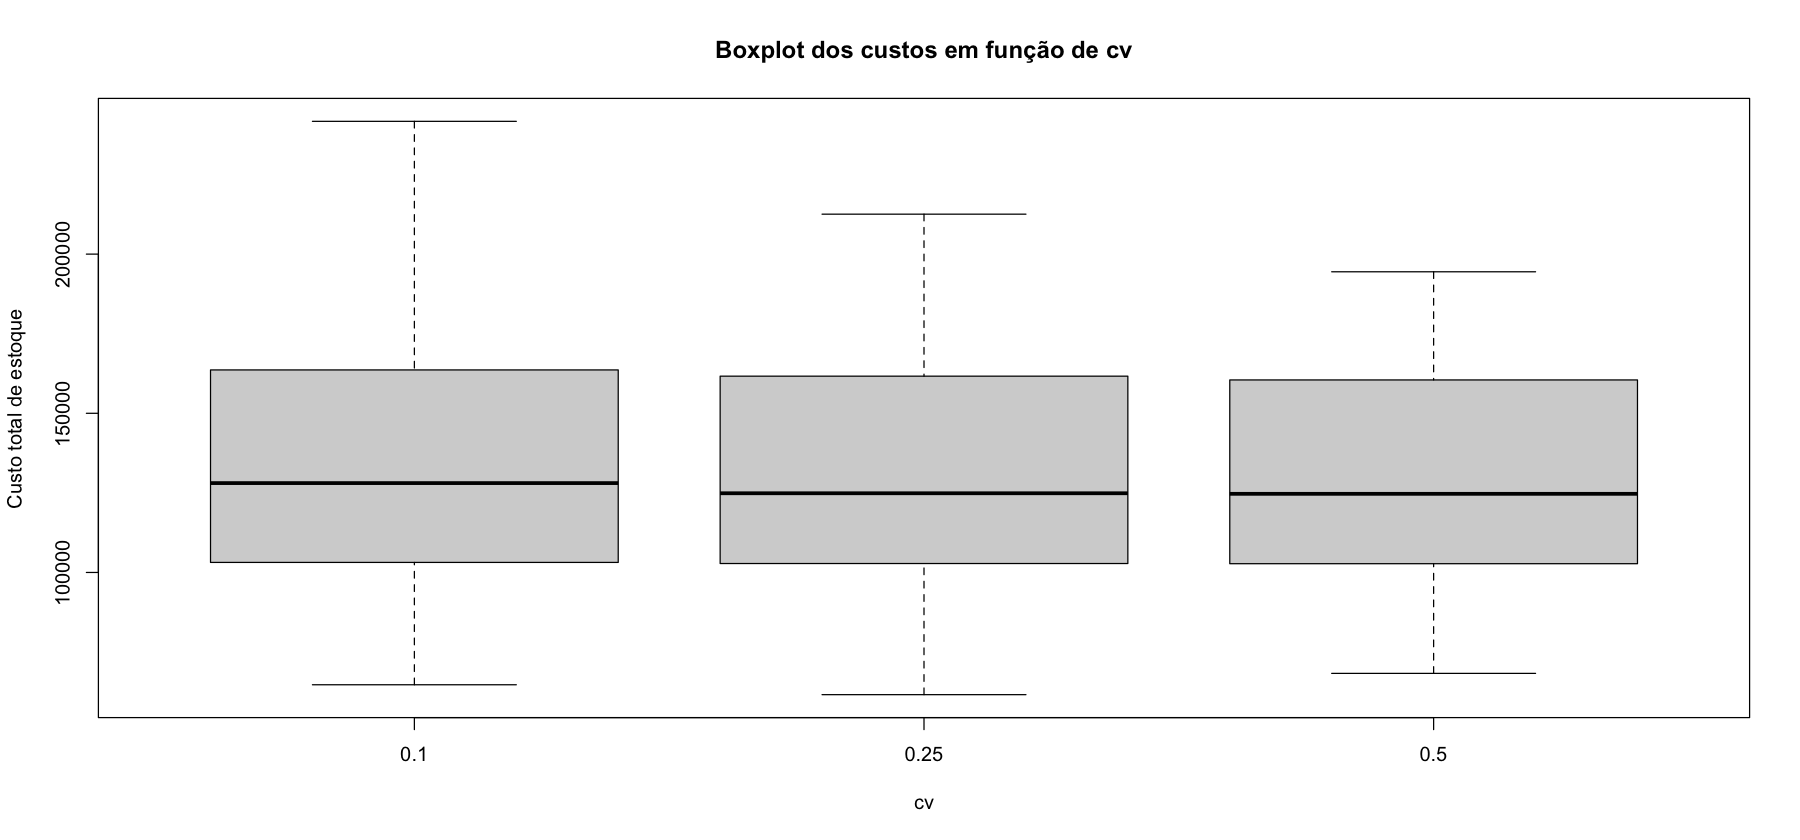

In [119]:
# Light gray background color
par(bg = "#ffffff")
# Add labels to the axes
xlabel <- "cv"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos em função de cv"
# boxplot_colors <- brewer.pal(4, "RdBu")

boxplot(TIC~cv, xlab = xlabel, ylab = ylabel, main = title)